## **Counting Statistics**
## Background


All measurements made in the laboratory contain sources of error or uncertainty.  Some error can be introduced by the device making the measurement. While others, like radioactive decay, originate as part of fundamental statistical variations of a process that is random. If we make a single measurement of a random, statistical process, the result of the measurement is only useful if we can answer: (1) How well does the measurement predict the outcome of future events? and (2) How close to the "true" value is the outcome of a single measurement? To answer these questions, we must know the statistical model that best describes our process.

Suppose we have a sample of $N$ nuclei and we would like to calculate the probability $P(x)$ that $x$ nuclei will decay in a set time interval.  The probability of decay of a single nucleus in this time interval is $p$. Assume that $p$ is constant. That is, each nucleus decays indepentently of the other nuclei.  This probability can be described by th binomial distribution:
$$
P(x)=\frac{N!}{x!(N-x)!}p^{x}(1-p)^{N-x}
$$
This distribution is used to describe simple, random experiments like tossing a coin or rolling dice. The distribution is characterized by its mean, $\bar{x}$, which is equal to $pN$, and the variance, $\sigma^{2}$.  

Suppose we are able to make repeated measurements of the number of counts in a fixed time interval. The experimental mean, $\bar{x}$, for a set of $N$ indenpendant measurements is:
$$
\bar{x}=\frac{1}{N}\sum_{i=1}^{N}x_{i}\tag{1}
$$
where $N$ is the total number of measurements and $x_{i}$ is the value of a given measurement.
The sample variance can be written as:
$$
\sigma^{2} =\frac{1}{N-1}\sum_{i=1}^{N}(\bar{x}-x_{i})^{2}\tag{2}
$$
The square root of the variance is the standard deviation. This is often used to quantify the level of uncertainty on a value being measured. For a binomial distribution, $\bar{n\rightarrow pN}$ and $\sigma^{2}=\bar{n}(1-p)$.

For a large number of rare events, the probability of recording a particular number, $x$, is given by the Poisson distribution:
$$
P(x)=\frac{\bar{x}^{x}e^{-\bar{x}}}{x!}
$$
where $\bar{x}=pN$. The probability of observing $x$ decays depends only on the mean value $\bar{x}$. The expected standard deviation is:
$$
\sigma _{i}=\sqrt{x_{i}}=\sqrt{\bar{x}}
$$
The Poisson distribution is a special case of the binomial distribution where $p<<1$. If the data fits the Poisson distribution, then the experimentally measured variance should be approximately the same as the calculated variance.

After the data is collected, it is important to check the goodness of the data. One method is to use the chi-squared, $\chi ^2$, test.
$$
\chi ^2=\frac{\sum_{i=1}^{N}(\bar{x}-x_{i})^2}{\bar{x}}
$$
where:
$x_{i}$ is the calue of each of the individual $N$ measurements and $\bar{x}$ is the mean of the $N$ measurements.  

To evaluate the $\chi ^2$ test, the expected result for data described by a Poission distribution is $N-1$. The greater the deviation from $N-1$, the greater the variation of the data from the expected behavior.


## **Equipment**

*   ST-365B Counter with GM Tube and stand
*   Cs-137 source

## **Procedure**


1.  Download and install the STU software.
2.  Attach the USB cable to the ST-365B and a USB port on your PC.
3.  Press the power switch on the front of the ST-365B to turn ON the device, and double click the SPECTRUM TECHNIQUES software icon to start the program.
4.  Select ST-365B from the ST-MODELS button.
5.  Set the voltage to 900 V. Turn on the high voltage (the indication should turn green)
6.   Set preset the Time to 10 and Runs to 75. (Be sure to verify that the values have changed)
7.  Run the counts (click the green diamond), this should take around 15 minutes.
8. Save the data with no source.
9. Set preset the Time to 2 and Runs to 375. (Be sure to verify that the values have changed)
10. Place a Cs-137 source in the second shelf from the top.
11. Run the counts, this should take around 15 minutes.
12. Save the data for the Cs-137 source counts.


## **Data Analysis**
1.  For the background and source data collected, calculate the experimental mean, sample variance, and standard deviation.  

In [3]:
# Import required packages
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import math

# Import data for Source Counts
bc = pd.read_csv('BackgroundCounts.csv')
sc = pd.read_csv('SourceCounts.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'BackgroundCounts.csv'

In [7]:
# Calculate the mean, standard deviation, and variance of the background data,
# print the results
bgmean=(stat.mean(bc['Counts']))
bgvariance=(stat.variance(bc['Counts']))
bgstdev=stat.stdev(bc['Counts'])
print(f"{bgmean=} {bgvariance=} {bgstdev=}")

bgmean=3.89333


In [1]:
# Calculate the mean, standard deviation, and variance of the source data, print
# the results to 3 decimal places
scmean=(stat.mean(sc['Counts']))
scvariance=(stat.variance(sc['Counts']))
scstdev=stat.stdev(sc['Counts'])
print(f"{scmean=}:.3f {scvariance=}:.3f {scstdev=}:.3f")

NameError: name 'stat' is not defined

2.  Calculate the statistical uncertainty of a single measurment for the background and source data. Use $\sigma =\sqrt{\bar{x}}$. How does this compare to the measured standard deviation for the datasets?

In [ ]:
# Calculate the uncertainty of the measurements and print the results
bgsigma=np.sqrt(bgmean)
scsigma=np.sqrt(scmean)
print(f"{bgsigma=}:.3f {scsigma=}:.3f")

bgsigma=1.973153144926499 scsigma=5.77304079320422


In [10]:
# Calculate and print the percent difference for uncertiainty and measured
# standard deviation, and print the results
bgdif=(bgstdev-bgsigma)/bgstdev
scdif=(scstdev-scsigma)/scstdev
print(f"'Background Difference = ',{100*bgdif}:.1f,'%'")
print(f"'Source Difference = ',{100*scdif}:.1f,'%'")

NameError: name 'bgstdev' is not defined

3. Define a guassian function to predict the expected results for the background and sourcecounts counting based upon the datasets' averages and standard deviations.

In [ ]:
# Define a function for a guassian PDF. x0 is data average, stdev is data
# standard deviation
def gauss(x,x0,stdev):
    return (1/(stdev*np.sqrt(2*np.pi)))*(np.exp(-0.5*((x-x0)/stdev)**2))

# Create empty arrays to hold the guassian predictions
bggauss=[]
scgauss=[]

# Calculate the expected gaussian results for the data taken,
# and write the results to the array
# Guassian PDF is scaled by the number of data points to provide comprable
# results
for x in range(min(bc['Counts']), max(bc['Counts'])+1):
    bgg=((len(bc['Counts']))*(gauss(x,bgmean,bgstdev)))
    bggauss.append(bgg)

for x in range(min(sc['Counts']), max(sc['Counts'])+1):
    scg=((len(sc['Counts']))*(gauss(x,scmean,scstdev)))
    scgauss.append(scg)

4. Define a poisson function to predict the expected results for the background and sourcecounts counting based upon the datasets' averages and standard deviations.

In [ ]:
# Define a function for a poisson PDF. x0 is data average, stdev is data
# standard deviation
def poisson(x,mean):
    return (mean**x)*np.exp(-mean)/math.factorial(x)

# Create empty arrays to hold the poisson predictions
bgpoisson=[]
scpoisson=[]

# Calculate the expected poisson results for the data taken,
# and write the results to the array
# PDF is scaled by the number of data points to provide comprable
# results
for x in range(min(bc['Counts']), max(bc['Counts'])+1):
    bgp=((len(bc['Counts']))*(poisson(x,bgmean)))
    bgpoisson.append(bgp)

for x in range(min(sc['Counts']), max(sc['Counts'])+1):
    scp=((len(sc['Counts']))*(poisson(x,scmean)))
    scpoisson.append(scp)

5. Plot a histograms of the result of the background and source counts and compare them with overlays of the guassian and poisson fit results.

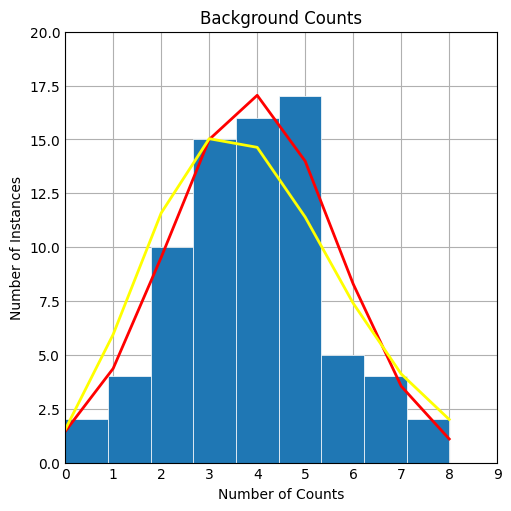

In [ ]:
# Determine the x axis range for the background count plot
x_ax0=range(min(bc['Counts']), max(bc['Counts'])+1)

# Select the data to be plotted
y0=(bc['Counts'])

# Determine the requried number of bins for the histogram, each bin should have
# a width of 1
b0=(bc['Counts'].max()-bc['Counts'].min()+1)

# Set the plot style
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
plt.style.use('_mpl-gallery')
ax.set_title("Background Counts")
ax.set_xlabel('Number of Counts')
ax.set_ylabel('Number of Instances')

# Create a histogram of the source count data
ax.hist(y0, bins=b0, linewidth=0.5, edgecolor="white")

# Create a line plot of the guassian fit of the data
ax.plot(x_ax0, bggauss, linewidth=2.0, color='red')

# Create a line plot of the guassian fit of the data
ax.plot(x_ax0, bgpoisson, linewidth=2.0, color='yellow')

# Set the x axis for the plot
ax.set(xlim=(bc['Counts'].min(), bc['Counts'].max()+1),
       ylim=(0,20))

# Create the plot
plt.show()


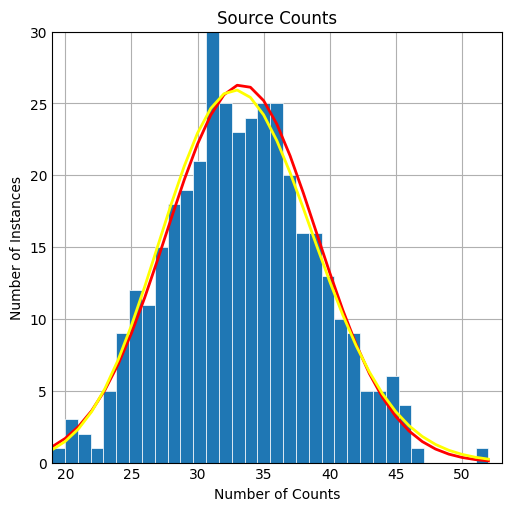

In [ ]:
# Determine the x axis range for the source count plot
x_ax1=range(min(sc['Counts']), max(sc['Counts'])+1)

# Select the data to be plotted
y1=(sc['Counts'])

# Determine the requried number of bins for the histogram, each bin should have
# a width of 1
b1=(sc['Counts'].max()-sc['Counts'].min()+1)

# Set the plot style
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
plt.style.use('_mpl-gallery')
ax.set_title("Source Counts")
ax.set_xlabel('Number of Counts')
ax.set_ylabel('Number of Instances')

# Create a histogram of the source count data
ax.hist(y1, bins=b1, linewidth=0.5, edgecolor="white")

# Create a line plot of the guassian fit of the data
ax.plot(x_ax1, scgauss, linewidth=2.0, color='red')

# Create a line plot of the guassian fit of the data
ax.plot(x_ax1, scpoisson, linewidth=2.0, color='yellow')

# Set the x axis for the plot
ax.set(xlim=(sc['Counts'].min(), sc['Counts'].max()+1),
       ylim=(0, 30))

# Create the plot
plt.show()


6.  Comment on how well the Poission and Guassian models describe your collected data.

In [ ]:
## Answer